In [1]:
import data.grid_configuration as grid_configuration_module
import os
import seaborn as sns
import comparators.transport as transport
import matplotlib.pyplot as plt
from data.parameters_names import ParametersNames as Parameters
from transporters.ptc_twiss.configuration import PtcTwissConfiguration
from transporters.ptc_track.configuration import PtcTrackConfiguration
from transporters.approximator.configuration import ApproximatorConfiguration

Welcome to JupyROOT 6.18/04


In [2]:
sns.set_style("whitegrid")

In [3]:
%cd ..
%cd ..

/home/rafalmucha/Pobrane/optic/optics_generator_python
/home/rafalmucha/Pobrane/optic


In [4]:
#path_to_project = "/home/jakub/Desktop/optic_files"
path_to_project = "/home/rafalmucha/Pobrane/optic"

optic_folder_name = "2016"

ptc_twiss_script_file_name = "ptc_twiss_script.madx"

xml_file_name = "configuration_reconst_beam1.xml"
item_number = 2

serialized_approximator_file_name = "parametrization_6500GeV_0p4_185_reco.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"

In [5]:
path_to_xml_file = os.path.join(path_to_project, optic_folder_name, xml_file_name)
twiss_configuration = PtcTwissConfiguration.get_configuration_from_file(path_to_xml_file, item_number, True)

In [6]:
track_configuration = PtcTrackConfiguration.get_track_configuration_from_xml_file(path_to_xml_file, item_number)

In [7]:
path_to_approximator = os.path.join(path_to_project, optic_folder_name, serialized_approximator_file_name)
approximator_configuration = ApproximatorConfiguration(path_to_approximator, approximator_name)

In [8]:
x_mean = 0.0
delta_x = 4e-3
theta_x_mean = 0.000
delta_theta_x = 1.3e-3
y_mean = 0.0
delta_y = 4e-3
theta_y_mean = 0.00
delta_theta_y = 1.3e-3
pt_mean = -0.15
delta_pt = 0.15

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 12000

grid_configuration = grid_configuration_module.CanonicalCoordinatesGridConfiguration.from_sigma(x_mean, delta_x, number_of_x_values,
                                                        theta_x_mean, delta_theta_x, number_of_theta_x_values,
                                                        y_mean, delta_y, number_of_y_values,
                                                        theta_y_mean, delta_theta_y, number_of_theta_y_values,
                                                        pt_mean, delta_pt, number_of_pt_values)
particles = grid_configuration.generate_randomly()

In [9]:
title_sufix = r"2016"
transporter1 = "ptc_track"
transporter2 = "approximator"

In [10]:
transporters = {
    transporter1: track_configuration,
    transporter2: approximator_configuration
}

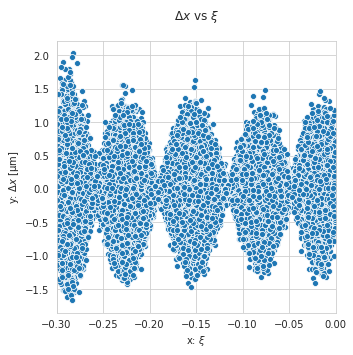

In [11]:
fig = plt.gcf()
fig.set_size_inches(5, 5)

title_sufix = "2016 optics\nError over training scope\nC++ code"

datasets = transport.compare(particles, transporters)
datasets[list(datasets.keys())[0]].plot(x = Parameters.PT, y = Parameters.DELTA_X, plot_function=sns.scatterplot)

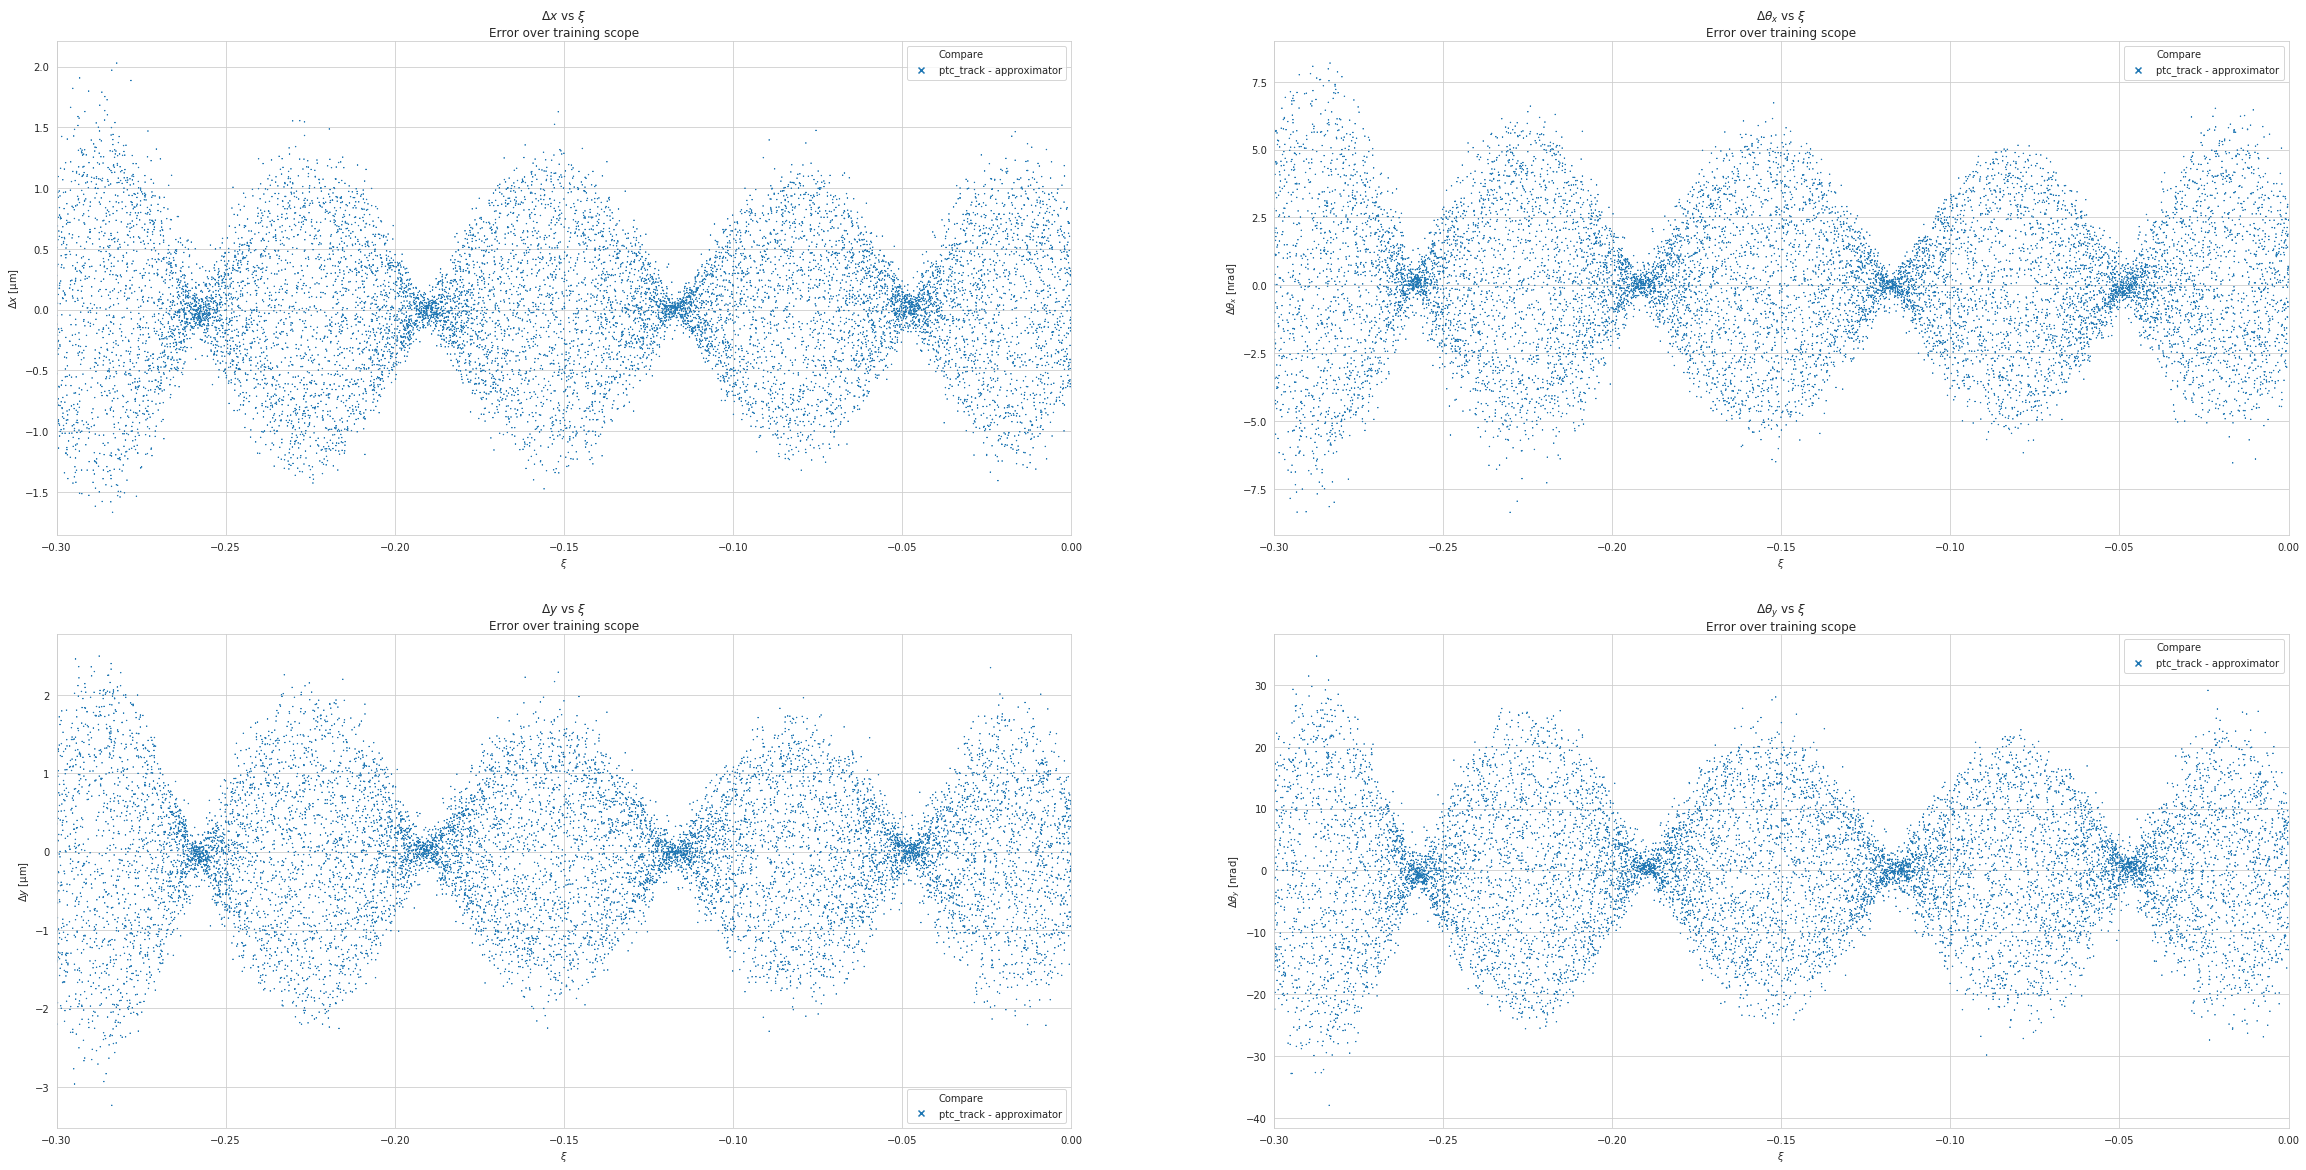

In [12]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(40,20)

title_sufix = r"Error over training scope"


transport.plot(datasets, Parameters.X, Parameters.PT, title_sufix=title_sufix, ax=axes[0][0])
transport.plot(datasets, Parameters.THETA_X, Parameters.PT, title_sufix=title_sufix, ax=axes[0][1])
transport.plot(datasets, Parameters.Y, Parameters.PT, title_sufix=title_sufix, ax=axes[1][0])
transport.plot(datasets, Parameters.THETA_Y, Parameters.PT, title_sufix=title_sufix, ax=axes[1][1])